In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
np.random.seed(25)
tips = sns.load_dataset('tips')

X = tips[['total_bill', 'tip', 'size']]
y = tips.smoker

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [13]:
# Create the decision tree object and specify hyperparams
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- total_bill <= 32.65
|   |--- total_bill <= 7.89
|   |   |--- class: Yes
|   |--- total_bill >  7.89
|   |   |--- total_bill <= 28.36
|   |   |   |--- class: No
|   |   |--- total_bill >  28.36
|   |   |   |--- class: No
|--- total_bill >  32.65
|   |--- size <= 5.00
|   |   |--- class: Yes
|   |--- size >  5.00
|   |   |--- class: No



In [7]:
tree.predict(X_train)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No'], dtype=object)

In [9]:
predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.68      0.86      0.76        22
         Yes       0.50      0.25      0.33        12

    accuracy                           0.65        34
   macro avg       0.59      0.56      0.55        34
weighted avg       0.62      0.65      0.61        34



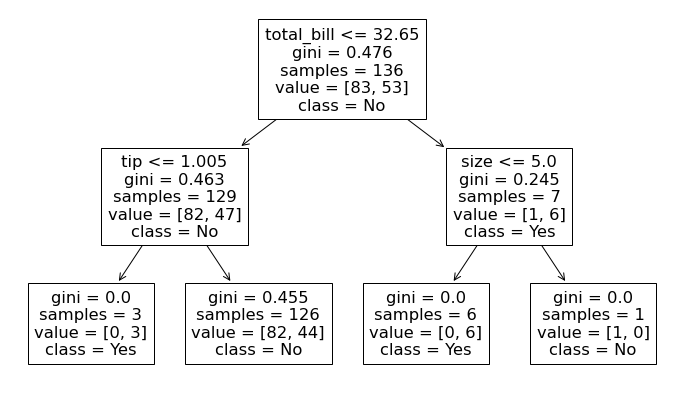

In [10]:
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

In [14]:
# Create the decision tree object and specify hyperparams
tree = DecisionTreeClassifier(max_depth=None)
tree.fit(X_train, y_train)

print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- total_bill <= 32.65
|   |--- tip <= 1.00
|   |   |--- class: Yes
|   |--- tip >  1.00
|   |   |--- total_bill <= 28.36
|   |   |   |--- total_bill <= 26.50
|   |   |   |   |--- tip <= 3.96
|   |   |   |   |   |--- size <= 2.50
|   |   |   |   |   |   |--- tip <= 1.49
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- tip >  1.49
|   |   |   |   |   |   |   |--- tip <= 3.49
|   |   |   |   |   |   |   |   |--- tip <= 3.39
|   |   |   |   |   |   |   |   |   |--- tip <= 3.23
|   |   |   |   |   |   |   |   |   |   |--- tip <= 3.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- tip >  3.05
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- tip >  3.23
|   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- tip >  3.39
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- ti

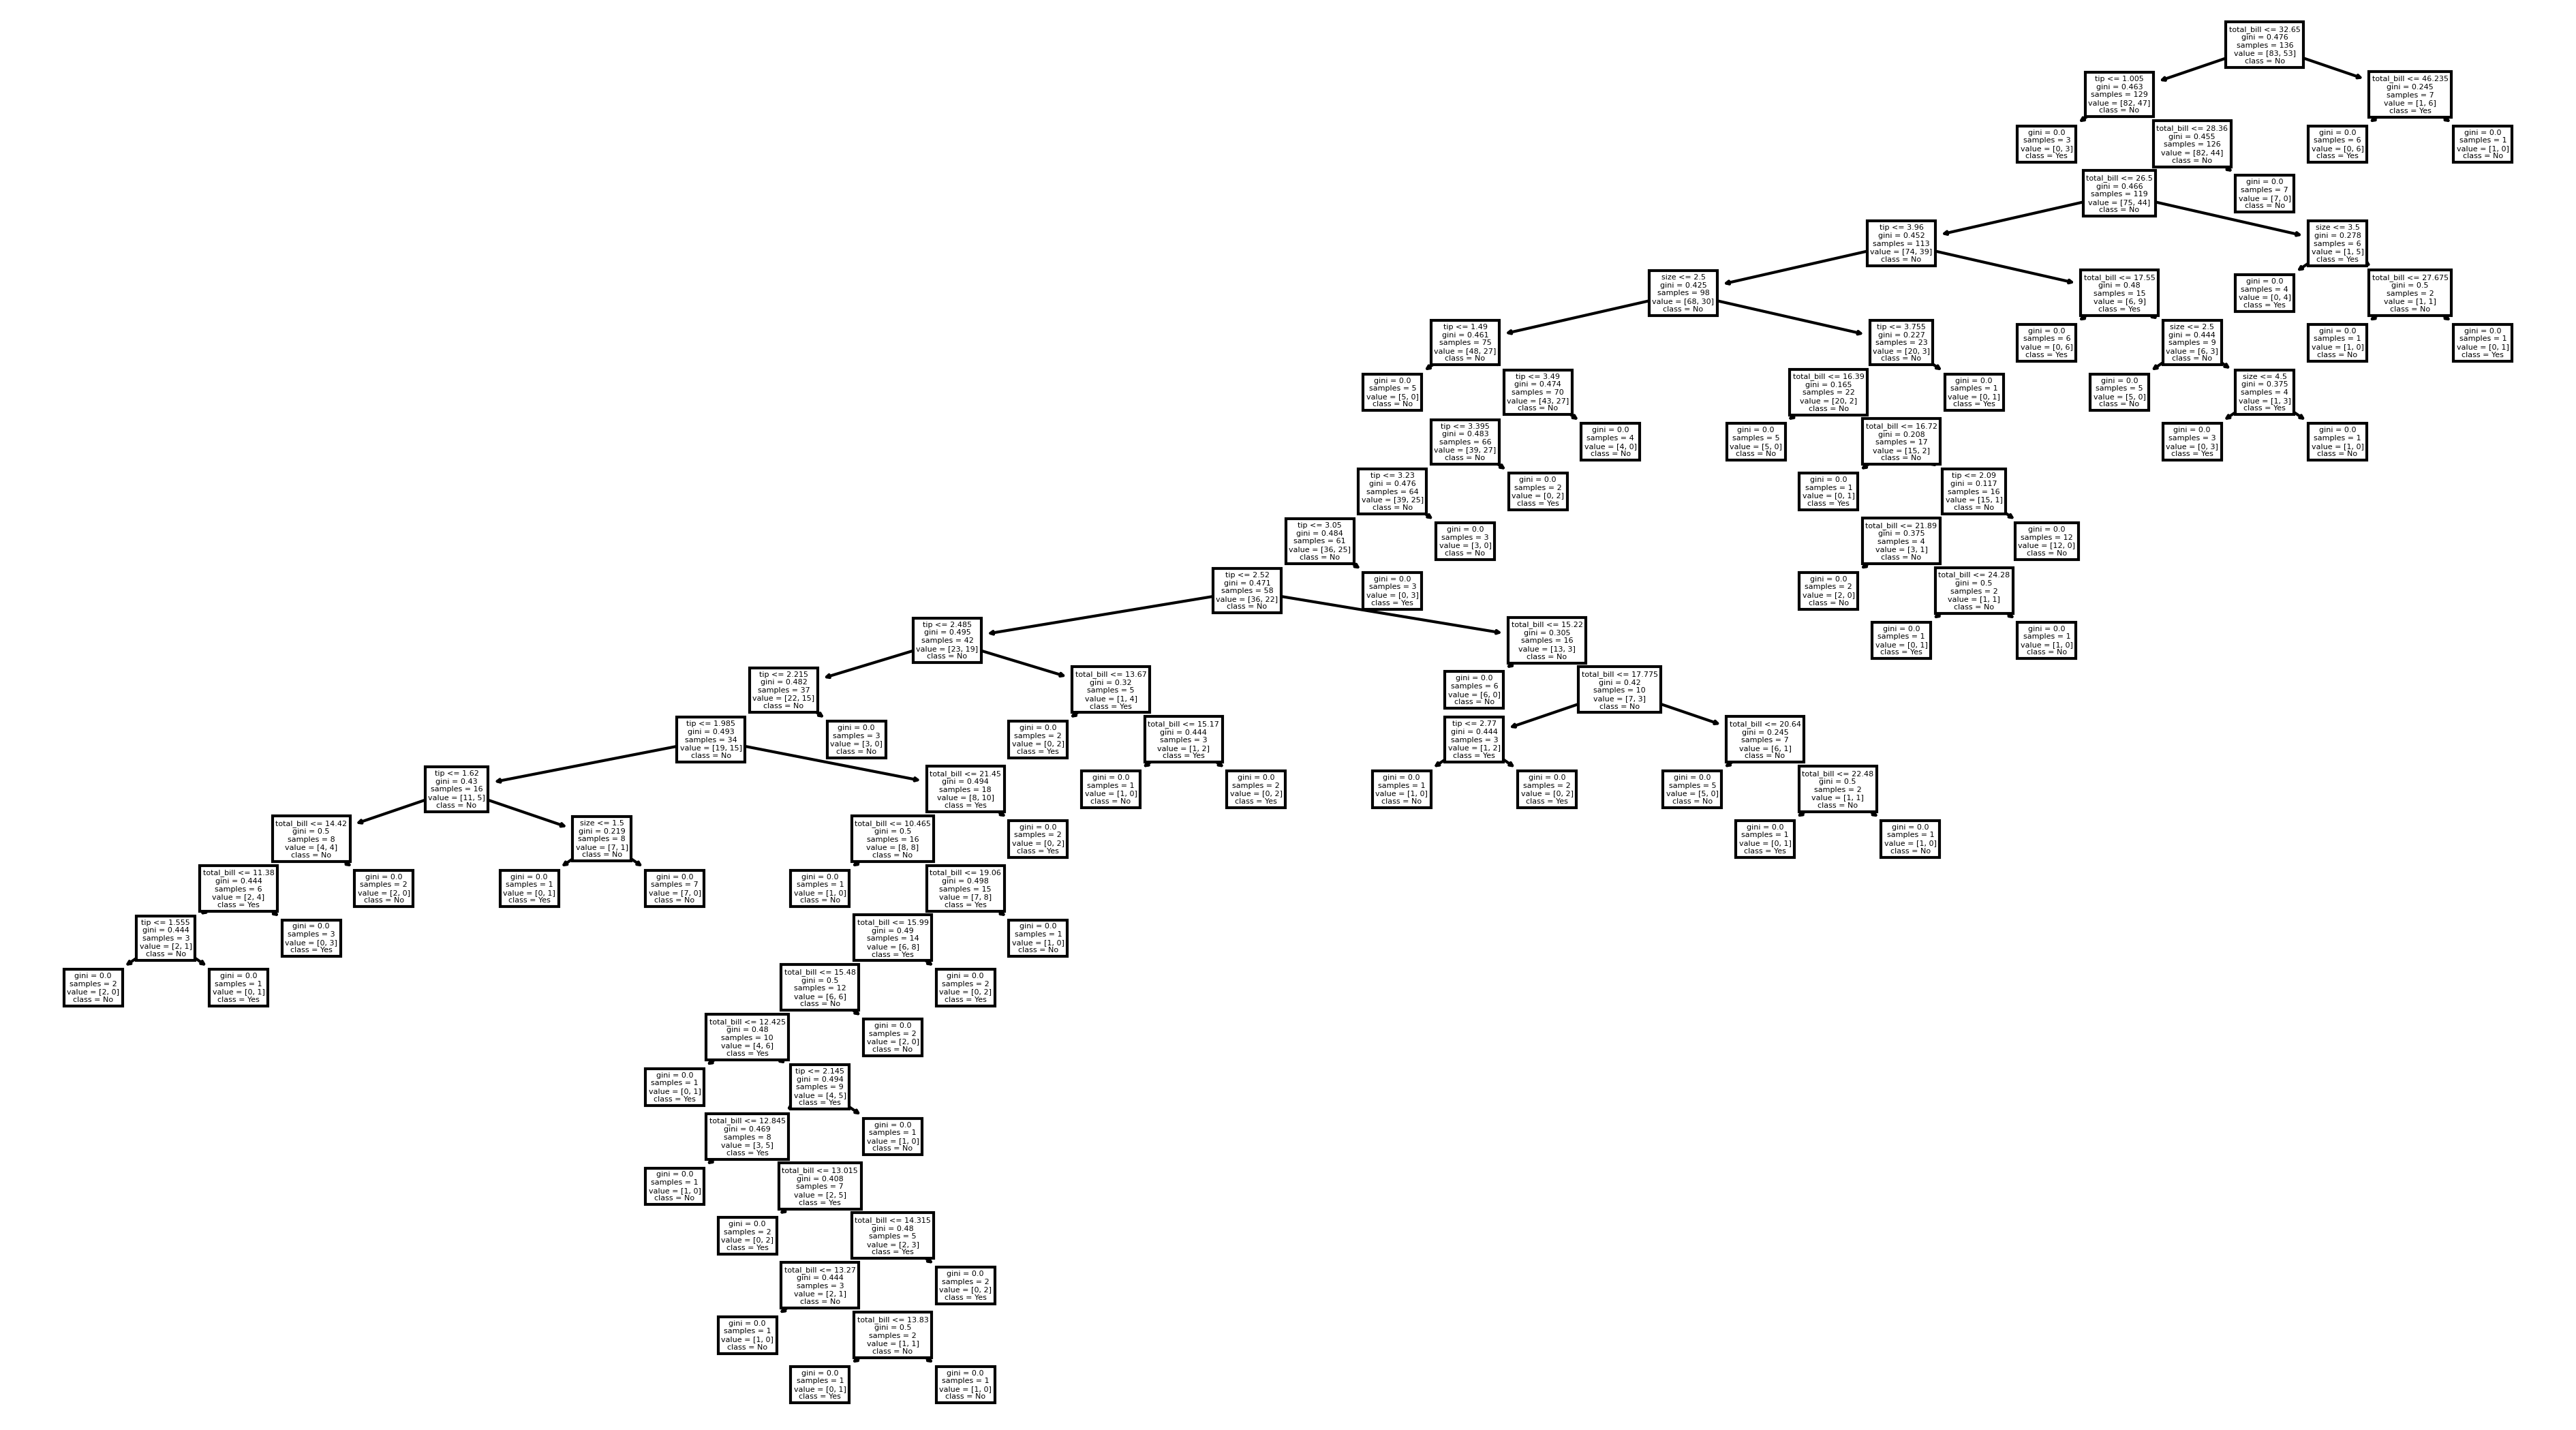

In [16]:
plt.figure(figsize=(16, 9), dpi=300)
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

In [18]:
tree.score(X_train, y_train)

1.0

In [17]:
tree.score(X_validate, y_validate)

0.6176470588235294

In [20]:
y_train.value_counts(normalize=True)

No     0.610294
Yes    0.389706
Name: smoker, dtype: float64

## What next?

- make more models, try out different combinations of indep variables and hyperparams
    - our X can change, but our y remains constant
- quantify and compare models (on validate!) against each other **and** against the baseline
- when do we stop? When we run out of time